# Falling particle

This notebook illustrates the calculation of the particle falling velocity
and boundary layer thickness as described in section 3(a) of the manuscript.
It is also used to generates Figure 2.

In [1]:
# Import modules and setup plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import falling

## Falling velocity and Reynolds number

SOME WORDS... just compare our equs with stokes...

## Dynamical regime and boundary layer thickness

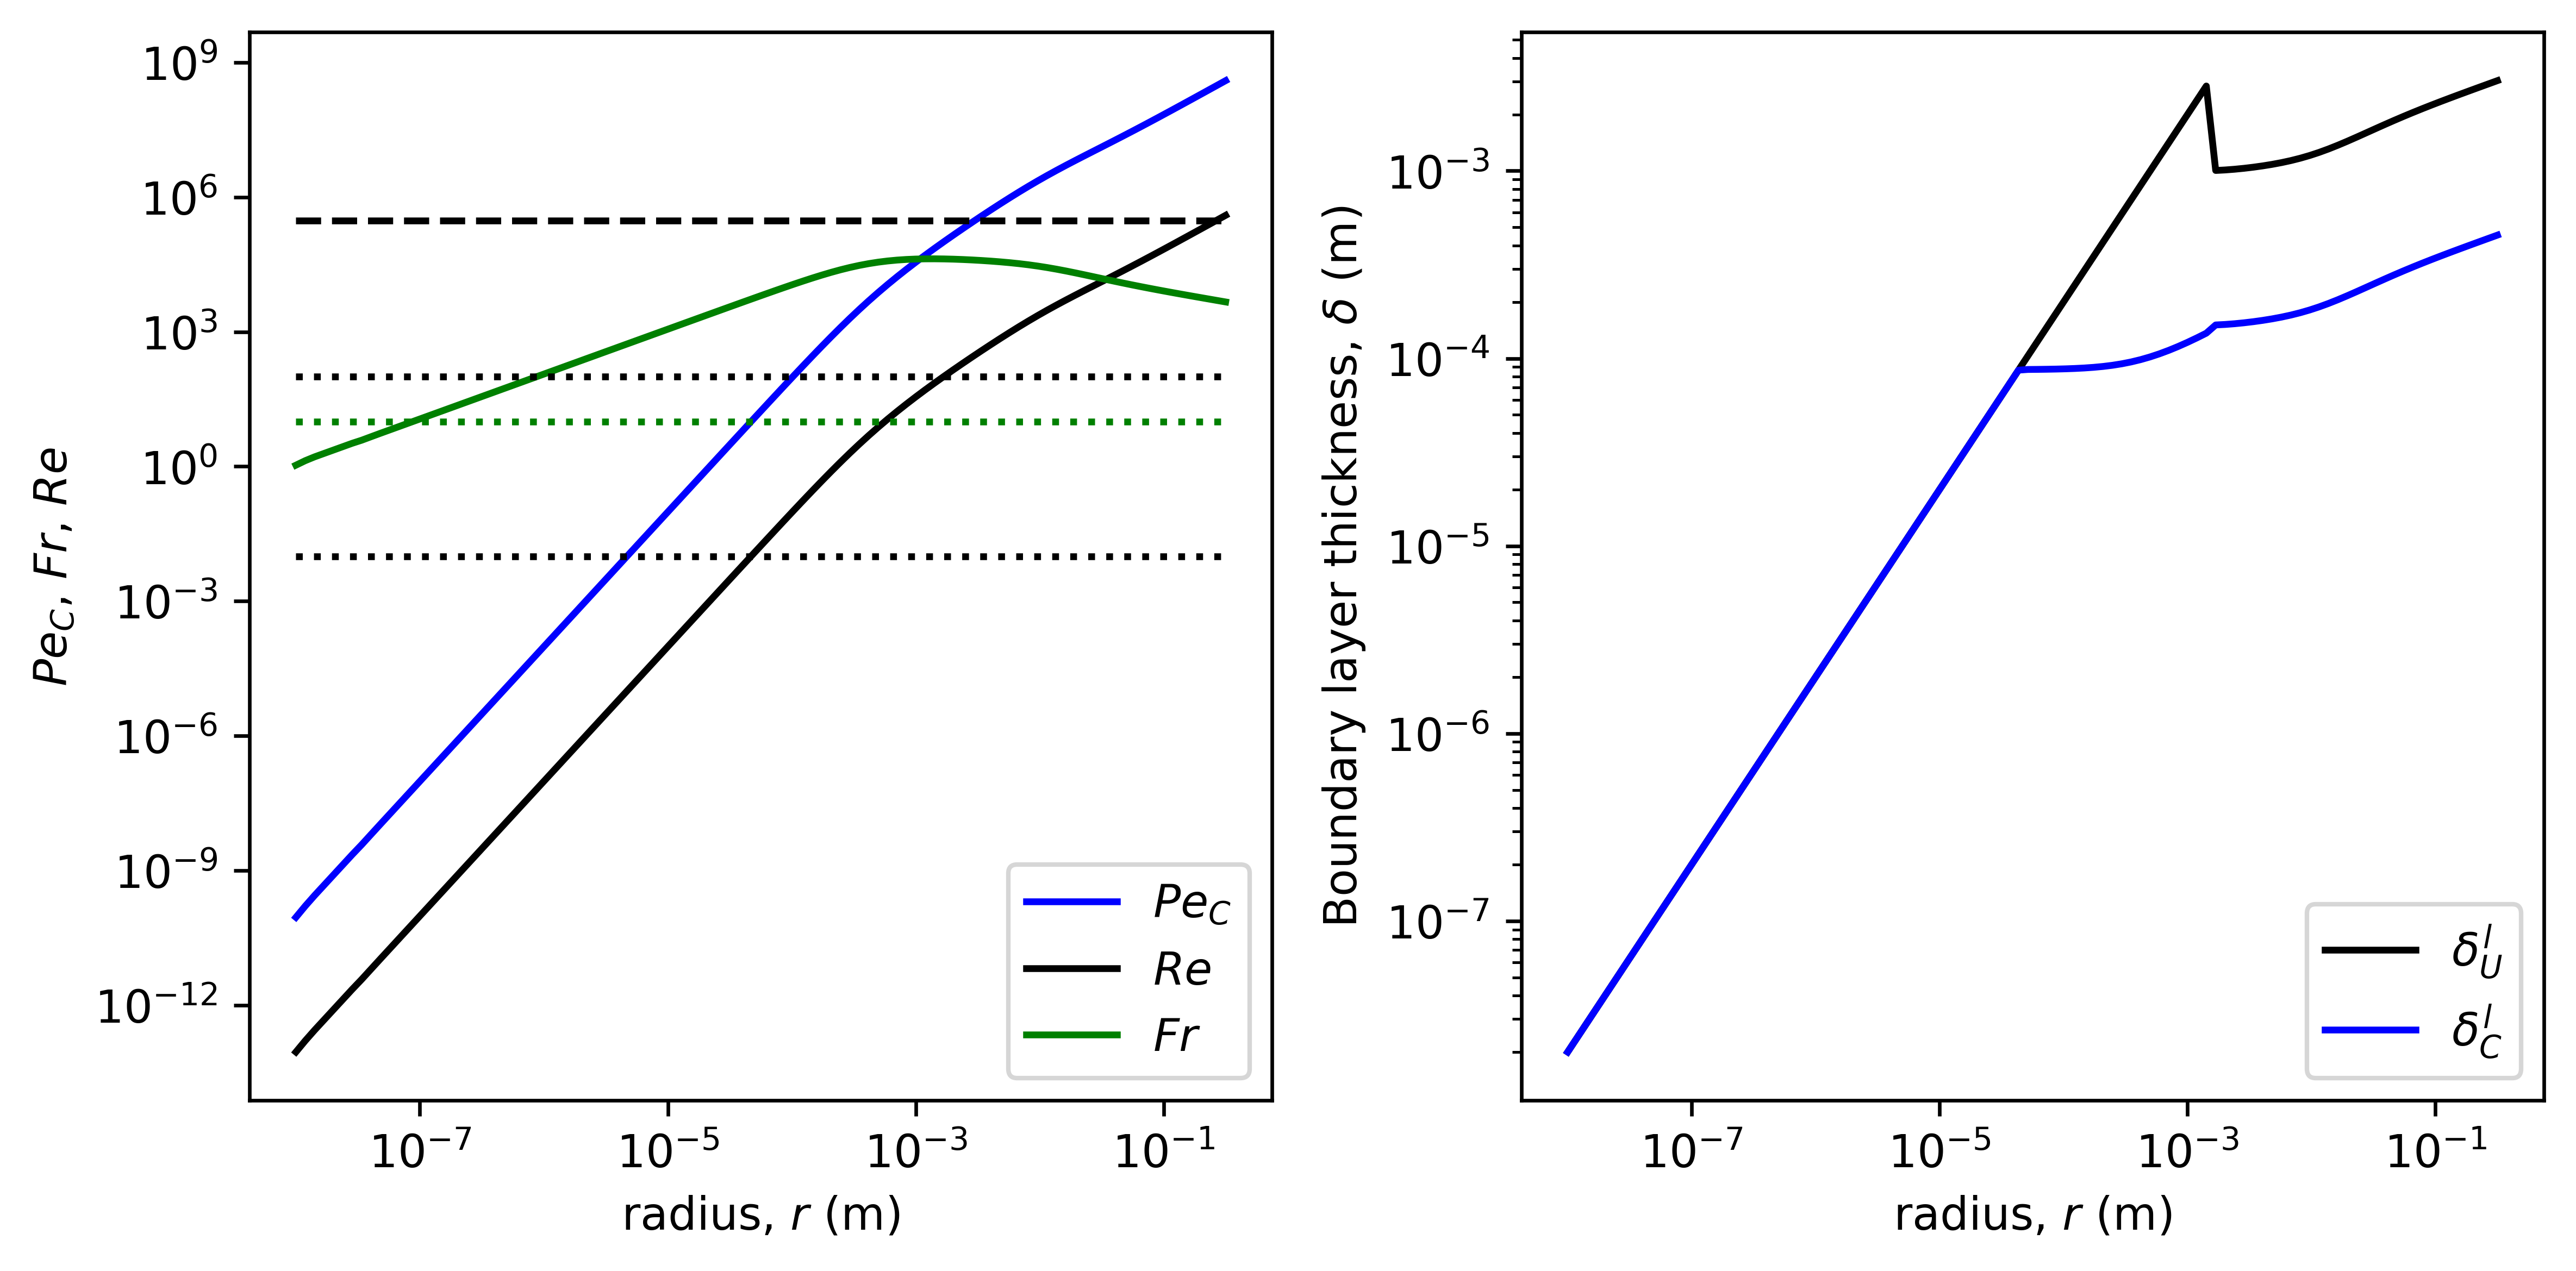

In [2]:
# Do calculation for some radii
r = np.logspace(-8,-0.5,num=100)

# Estimated typical F-layer properties
kinematic_viscosity = 1.0E-6     # kinematic viscosity
gravity = 4.4                    # At ICB
rho_l = 12100                    # liquid density
rho_s = 12700                    # solid density
delta_density = rho_s - rho_l
k     = 100.0                    # thermal conductivity of solid iron
cp    = 750                      # specific heat
thermal_diffusivity = k/(rho_l*cp)# thermal diffusivity of liquid
chemical_diffusivity = 1e-9      # self-diffusion of O in liquid


# Calculation of properties (this is vectorised)
falling_velocity, drag_coefficient, re, pe_t, pe_c, fr, \
    delta_u, delta_t, delta_c = falling.zhang_particle_dynamics(r, 
            kinematic_viscosity, gravity, delta_density, rho_l,
            thermal_diffusivity, chemical_diffusivity)

# Plotting results. 8" wide and 600 dpi (approx A4, which is what we want)
fig, axs = plt.subplots(ncols=2, figsize=(8,4), dpi=600)

ax = axs[0]
ax.set_xscale('log')
ax.set_yscale('log')
#ax.plot(r, pe_t, label="$Pe_T$", color="red")
ax.plot(r, pe_c, label="$Pe_C$", color="blue")
ax.plot(r, re, label="$Re$", color="black")
ax.plot(r, fr, label="$Fr$", color="green")
ax.plot(r, 3e5*np.ones(len(r)), color="black", linestyle='--') # Upper limit of empirical fit for Cd
ax.plot(r, 1e-2*np.ones(len(r)), color="black", linestyle=':') #Mark the intermediate regime in Inman et al
ax.plot(r, 1e2 *np.ones(len(r)), color="black", linestyle=':')
ax.plot(r, 10.0 *np.ones(len(r)), color="green", linestyle=':') # Change in Fr regime

ax.set_xlabel('radius, $r$ (m)')
ax.set_ylabel('$Pe_C$, $Fr$, $Re$')
ax.legend(loc=4)

ax = axs[1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(r, delta_u, label="$\delta_U^l$", color="black")
#ax.plot(r, delta_t, label="$\delta_T^l$", color="red")
ax.plot(r, delta_c, label="$\delta_C^l$", color="blue")
ax.set_xlabel('radius, $r$ (m)')
ax.set_ylabel('Boundary layer thickness, $\delta$ (m)')
ax.legend(loc=4)

plt.tight_layout()
plt.show()